In [47]:
from utils import *

import folium
import geopandas as gpd
from shapely.geometry import Point

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [48]:
train_df = pd.read_csv('data/train.csv', index_col='id', parse_dates=['timestamp'])
test_df = pd.read_csv('data/test.csv', index_col='id', parse_dates=['timestamp'])

train_df = encode(train_df)
test_df = encode(test_df)

all_df = pd.concat([train_df, test_df])

In [52]:
all_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,timestamp_year,timestamp_month,timestamp_day
id,,,,,,,,,,,,,,,,,,,,,
1,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,13,22,1,0,52,4,5850000.0,2011,8,20
2,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,15,29,1,10,66,14,6000000.0,2011,8,23
3,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,11,27,0,4,67,10,5700000.0,2011,8,27
4,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,4,4,0,0,26,3,13100000.0,2011,9,1
5,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,135,236,2,91,195,14,16331452.0,2011,9,5


In [4]:
all_df.full_sq.sort_values().unique()[:10]

array([ 0.,  1.,  2.,  5.,  6.,  9., 10., 11., 12., 13.])

In [5]:
all_df[all_df['full_sq'] < 5] = np.nan
all_df[all_df['full_sq'] > 1500] = np.nan


In [6]:
all_df.life_sq.sort_values().unique()[-100:]

array([ 106.61,  107.  ,  108.  ,  109.  ,  109.4 ,  110.  ,  110.05,
        110.6 ,  111.  ,  111.8 ,  112.  ,  113.  ,  114.  ,  115.  ,
        116.  ,  116.2 ,  117.  ,  118.  ,  118.2 ,  119.  ,  120.  ,
        120.7 ,  121.  ,  122.  ,  122.6 ,  123.  ,  123.8 ,  124.  ,
        125.  ,  126.  ,  128.  ,  129.3 ,  129.6 ,  130.  ,  130.7 ,
        133.  ,  134.  ,  135.3 ,  135.55,  136.  ,  138.  ,  138.5 ,
        139.  ,  140.  ,  141.  ,  142.  ,  143.  ,  144.  ,  144.4 ,
        144.51,  145.  ,  146.  ,  147.  ,  148.  ,  149.  ,  150.  ,
        151.5 ,  153.  ,  154.53,  155.  ,  157.  ,  158.  ,  159.  ,
        160.  ,  162.  ,  163.  ,  165.  ,  166.  ,  167.  ,  172.  ,
        174.  ,  176.  ,  178.  ,  179.  ,  183.  ,  189.  ,  191.  ,
        195.  ,  197.  ,  209.  ,  232.  ,  232.7 ,  237.  ,  259.  ,
        281.  ,  283.  ,  301.  ,  325.  ,  349.  ,  361.  ,  407.  ,
        426.  ,  435.  ,  458.  ,  637.  ,  742.  ,  802.  ,  869.  ,
       7478.  ,     

In [7]:
all_df[all_df['life_sq'] > 460]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,timestamp_year,timestamp_month,timestamp_day
id,,,,,,,,,,,,,,,,,,,,,
9649,82.0,802.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,7.0,16.0,0.0,0.0,34.0,5.0,12031350.0,2013.0,8.0,6.0
13549,79.0,7478.0,8.0,17.0,1.0,2014.0,3.0,1.0,1.0,1.0,...,1.0,7.0,1.0,0.0,12.0,1.0,7705000.0,2013.0,12.0,30.0
22788,637.0,637.0,18.0,19.0,4.0,2016.0,2.0,10.0,1.0,1.0,...,150.0,249.0,2.0,105.0,203.0,13.0,4725142.0,2014.0,9.0,23.0
31075,74.2,742.0,2.0,17.0,1.0,NaN,2.0,1.0,1.0,1.0,...,3.0,12.0,0.0,0.0,6.0,3.0,NaN,2015.0,8.0,17.0
33265,86.9,869.0,3.0,20.0,4.0,0.0,3.0,0.0,1.0,1.0,...,5.0,13.0,0.0,0.0,29.0,3.0,NaN,2015.0,12.0,1.0


In [58]:
((all_df['full_all'] - all_df['male_f'] - all_df['female_f']) < 10).sum() == len(all_df)

True

In [60]:
((all_df['young_all'] - all_df['young_male'] - all_df['young_female']) < 10).sum() == len(all_df)

True

In [61]:
((all_df['work_all'] - all_df['work_male'] - all_df['work_female']) < 10).sum() == len(all_df)

True

In [62]:
((all_df['ekder_all'] - all_df['ekder_male'] - all_df['ekder_female']) < 10).sum() == len(all_df)

True

In [64]:
((all_df['0_6_all'] - all_df['0_6_male'] - all_df['0_6_female']) < 10).sum() == len(all_df)

True

In [66]:
((all_df['0_17_all'] - all_df['0_17_male'] - all_df['0_17_female']) < 10).sum() == len(all_df)

True

In [68]:
((all_df['16_29_all'] - all_df['16_29_male'] - all_df['16_29_female']) < 10).sum() == len(all_df)

True

In [69]:
((all_df['0_13_all'] - all_df['0_13_male'] - all_df['0_13_female']) < 10).sum() == len(all_df)

True

In [89]:
cols[200]

'office_sqm_1500'

In [97]:
all_df['office_sqm_1500'].sort_values().unique()[-10:]

array([2776796, 2814896, 2817498, 2819294, 2819618, 2869596, 2884726,
       2897296, 2908344, 2951861])

<AxesSubplot:>

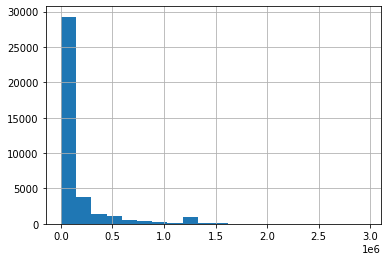

In [92]:
all_df[cols[200]].hist(bins=20)

In [8]:
all_df[all_df['life_sq'] < 5] = np.nan
all_df[all_df['life_sq'] > 500] = np.nan


In [12]:
cols = all_df.columns.values

In [22]:
all_df[cols[11]].sort_values().unique()[-10:]
print('OK')

OK


In [38]:
cols[16]

'preschool_quota'

In [42]:
all_df[cols[16]].sort_values().unique()[-10:]

array([ 5001.,  5041.,  5088.,  5153.,  5278.,  6839.,  7610., 10175.,
       11926.,    nan])

In [10]:
allDf.loc[allDf.life_sq>0.8*allDf.full_sq,'life_sq'] = np.nan
allDf.loc[allDf.floor>allDf.max_floor,'max_floor'] = np.nan
allDf.loc[allDf.kitch_sq>=allDf.life_sq,'kitch_sq'] = np.nan


NameError: name 'allDf' is not defined

In [100]:
all_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,timestamp_year,timestamp_month,timestamp_day
id,,,,,,,,,,,,,,,,,,,,,
1,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,13,22,1,0,52,4,5850000.0,2011,8,20
2,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,15,29,1,10,66,14,6000000.0,2011,8,23
3,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,11,27,0,4,67,10,5700000.0,2011,8,27
4,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,4,4,0,0,26,3,13100000.0,2011,9,1
5,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,135,236,2,91,195,14,16331452.0,2011,9,5


In [102]:
all_df.floor.sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 38., 40.,
       41., 44., 77., nan])

In [ ]:
all_df[all_df['floor'] == 0] = np.nan
all_df[all_df['floor'] == 77] = np.nan

In [104]:
all_df.max_floor.sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  44.,
        45.,  47.,  48.,  57.,  99., 117.,  nan])

In [105]:
all_df[all_df['max_floor'] == 0] = np.nan

In [106]:
all_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,timestamp_year,timestamp_month,timestamp_day
id,,,,,,,,,,,,,,,,,,,,,
1,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0,2011.0,8.0,20.0
2,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0,2011.0,8.0,23.0
3,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0,2011.0,8.0,27.0
4,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0,2011.0,9.0,1.0
5,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0,2011.0,9.0,5.0


In [115]:
all_df.material.sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6., nan])

OK


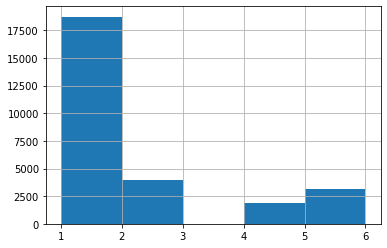

In [116]:
all_df.material.hist(bins=5)
print('OK')

In [118]:
all_df.num_room.sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 17., 19.,
       nan])

In [124]:
all_df.build_year.sort_values().unique()

array([0.0000000e+00, 1.0000000e+00, 2.0000000e+00, 3.0000000e+00,
       2.0000000e+01, 7.1000000e+01, 2.1500000e+02, 1.6910000e+03,
       1.8600000e+03, 1.8750000e+03, 1.8760000e+03, 1.8860000e+03,
       1.8900000e+03, 1.8950000e+03, 1.8960000e+03, 1.8980000e+03,
       1.9000000e+03, 1.9020000e+03, 1.9040000e+03, 1.9050000e+03,
       1.9060000e+03, 1.9070000e+03, 1.9080000e+03, 1.9100000e+03,
       1.9110000e+03, 1.9120000e+03, 1.9140000e+03, 1.9150000e+03,
       1.9170000e+03, 1.9200000e+03, 1.9240000e+03, 1.9250000e+03,
       1.9260000e+03, 1.9270000e+03, 1.9280000e+03, 1.9290000e+03,
       1.9300000e+03, 1.9310000e+03, 1.9320000e+03, 1.9330000e+03,
       1.9340000e+03, 1.9350000e+03, 1.9360000e+03, 1.9370000e+03,
       1.9380000e+03, 1.9390000e+03, 1.9400000e+03, 1.9410000e+03,
       1.9420000e+03, 1.9430000e+03, 1.9450000e+03, 1.9460000e+03,
       1.9470000e+03, 1.9480000e+03, 1.9490000e+03, 1.9500000e+03,
       1.9510000e+03, 1.9520000e+03, 1.9530000e+03, 1.9540000e

In [ ]:
all_df[all_df['build_year'] < 1850] = np.nan
all_df[all_df['build_year'] < 20052009] = 2005
all_df[all_df['build_year'] > 2020] = np.nan

In [119]:
all_df[all_df['num_room'] > 15]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,timestamp_year,timestamp_month,timestamp_day
id,,,,,,,,,,,,,,,,,,,,,
11624,40.0,19.0,17.0,17.0,1.0,2011.0,19.0,7.0,3.0,0.0,...,2.0,11.0,0.0,0.0,6.0,0.0,2630000.0,2013.0,10.0,28.0
26716,51.0,30.0,14.0,17.0,1.0,1984.0,17.0,8.0,3.0,0.0,...,6.0,37.0,1.0,7.0,84.0,10.0,13150000.0,2014.0,12.0,18.0
33648,38.4,19.1,3.0,17.0,1.0,1986.0,19.0,7.4,2.0,0.0,...,8.0,35.0,1.0,2.0,57.0,7.0,NaN,2015.0,12.0,14.0


In [ ]:
all_df[all_df['num_room'] == 0] = np.nan
all_df[all_df['num_room'] > 15] = np.nan

In [125]:
all_df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,timestamp_year,timestamp_month,timestamp_day
id,,,,,,,,,,,,,,,,,,,,,
1,43.0,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,13.0,22.0,1.0,0.0,52.0,4.0,5850000.0,2011.0,8.0,20.0
2,34.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,15.0,29.0,1.0,10.0,66.0,14.0,6000000.0,2011.0,8.0,23.0
3,43.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,11.0,27.0,0.0,4.0,67.0,10.0,5700000.0,2011.0,8.0,27.0
4,89.0,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,4.0,4.0,0.0,0.0,26.0,3.0,13100000.0,2011.0,9.0,1.0
5,77.0,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,135.0,236.0,2.0,91.0,195.0,14.0,16331452.0,2011.0,9.0,5.0


In [139]:
all_df[all_df['kitch_sq'] > 500]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,timestamp_year,timestamp_month,timestamp_day
id,,,,,,,,,,,,,,,,,,,,,
10371,79.0,41.0,5.0,17.0,6.0,2013.0,3.0,2013.0,1.0,1.0,...,1.0,7.0,1.0,0.0,12.0,1.0,7281225.0,2013.0,9.0,10.0
11523,38.0,23.0,11.0,14.0,5.0,1971.0,2.0,620.0,2.0,0.0,...,7.0,16.0,0.0,9.0,49.0,11.0,6300000.0,2013.0,10.0,24.0
13120,31.0,19.0,5.0,1.0,1.0,NaN,1.0,1970.0,3.0,0.0,...,27.0,44.0,0.0,12.0,117.0,12.0,3650000.0,2013.0,12.0,14.0
21418,43.0,43.0,3.0,1.0,1.0,2014.0,1.0,2014.0,1.0,1.0,...,0.0,12.0,1.0,0.0,6.0,1.0,3801200.0,2014.0,8.0,11.0
28737,31.0,16.0,2.0,12.0,5.0,1972.0,1.0,1974.0,3.0,0.0,...,1.0,2.0,0.0,2.0,7.0,2.0,1000000.0,2015.0,3.0,31.0
31381,53.9,32.1,3.0,9.0,1.0,1968.0,2.0,1968.0,2.0,0.0,...,12.0,13.0,1.0,1.0,59.0,4.0,NaN,2015.0,9.0,1.0
36811,58.5,58.5,15.0,17.0,1.0,2017.0,2.0,1000.0,NaN,1.0,...,0.0,8.0,0.0,0.0,3.0,2.0,NaN,2016.0,3.0,19.0


In [140]:
all_df[all_df['kitch_sq'] > 500] = np.nan
all_df[all_df['kitch_sq'] < 2] = np.nan

In [141]:
all_df.state.sort_values().unique()

array([ 1.,  2.,  3.,  4., 33., nan])

In [142]:
all_df[all_df['state'] > 30] = np.nan

In [3]:
geo_df = pd.read_csv('data/geo_data.csv')
geo_df = geo_df.merge(gpd.read_file('data/mo.geojson'), on='NAME')
geo_df.drop(['OKATO', 'OKTMO', 'OKATO_AO', 'NAME_AO', 'ABBREV_AO'], axis=1, inplace=True)
geo_df = gpd.GeoDataFrame(geo_df)
geo_df.head()

,NAME,sub_area,OKRUG,TYPE_MO,geometry
0,Киевский,Poselenie Kievskij,Troitsky,Поселение,"MULTIPOLYGON (((36.80310 55.44083, 36.80319 55..."
1,Филёвский Парк,Filevskij Park,Western,Муниципальный округ,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
2,Новофёдоровское,Poselenie Novofedorovskoe,Troitsky,Поселение,"POLYGON ((36.80357 55.45162, 36.80451 55.46551..."
3,Роговское,Poselenie Rogovskoe,Troitsky,Поселение,"POLYGON ((36.93724 55.24139, 36.93726 55.24161..."
4,"""Мосрентген""",Poselenie Mosrentgen,Novomoskovsky,Поселение,"POLYGON ((37.43956 55.62731, 37.44018 55.63042..."


In [4]:
coords_df = pd.read_csv('data/coords.csv', index_col='id')
coords_df.head()

,sub_area,kremlin_km,kremlin_km_new,latitude,longitude
id,,,,,
1,Bibirevo,15.156211,15.156692,55.887715,37.592880
2,Nagatinskij Zaton,8.698054,8.681034,55.684790,37.687819
3,Tekstil'shhiki,9.067885,9.028721,55.712887,37.743920
4,Mitino,19.487005,19.494437,55.847130,37.355531
5,Basmannoe,2.578671,2.548682,55.756594,37.657611


In [5]:
train_df['latitude'] = coords_df['latitude']
train_df['longitude'] = coords_df['longitude']

In [45]:
# m = folium.Map(location = [55.4822200, 37.6156000], zoom_start=9)

# geojson = folium.GeoJson(open('data/mo.geojson').read(), popup=folium.GeoJsonPopup(['NAME']))
# geojson.add_to(m)

# obj = train_df.loc[23587]

# folium.CircleMarker(location=(obj['latitude'], obj['longitude']),
#                     radius=1,
#                     popup=obj['kremlin_km'],
#                     color='red',
#                     weight=5).add_to(m)

# m